<h1>Linear Regressions</h1>
<h6>Saket Tiwari</h6>
Date: 20 Jul 2019

In [1]:
#Regression:-Values are continuous Classification:-Values are discrete

In [78]:
import numpy as np

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
#generating data
from sklearn.datasets import make_regression

In [81]:
X,y=make_regression(n_samples=500,n_features=1,bias=10, noise=15)
print(X.shape,y.shape)

(500, 1) (500,)


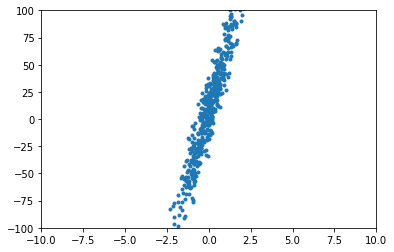

In [82]:
plt.xlim(-10,10)
plt.ylim(-100,100)
plt.plot(X,y,'.')
plt.show()

In [83]:
split=int(0.8*X.shape[0])

X_train=X[:split]
X_test=X[split:]

y_train=y[:split]
y_test=y[split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 1)
(100, 1)
(400,)
(100,)


In [54]:
def hypothesis(x,W):
    
    x0=1
    x1=x
    h=W[0] +  W[1]*x1
    return h

In [55]:
def get_error(X, W, y_true):
    
    err=0.0
    m=X.shape[0]
    
    for i in range(m):
        err+=(hypothesis(X[i], W) - y_true[i])**2
    
    err=err/(2*m) #average error to normalize the error
    return err

In [56]:
def gradient_descent(X , W, y_true, learning_rate=0.1):
    
    error=get_error(X , W, y_true)
    m=X.shape[0]
    grad0= 0.0
    grad1= 0.0
    
    for i in range(m):
        grad0+= (y_true[i]- hypothesis(X[i],W))
        grad1+= (y_true[i]- hypothesis(X[i],W))*(X[i])
        
    grad0 /=m
    grad1 /=m
    
    W[0]+= learning_rate*grad0
    W[1]+= learning_rate*grad1
    
    return error, W

In [67]:
W= np.array([0.1,0.1])
loss= []

for i in range(500):
    
    err, W =gradient_descent(X_train , W, y_train, learning_rate=0.1)
    loss.append(err)
    
print(W)

[10.34690149 48.62361285]


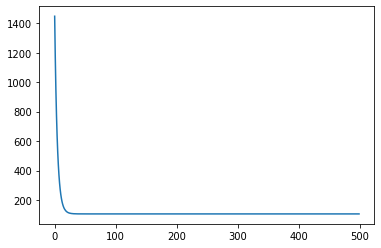

In [68]:
plt.plot(loss)
plt.show()

In [63]:
X_val=[i for i in X_train]
y_val=[ hypothesis(i,W) for i in X_val]

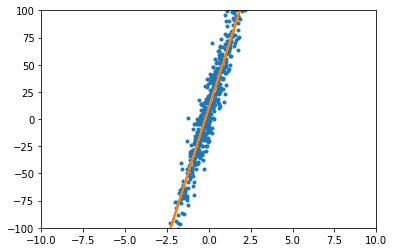

In [70]:
plt.xlim(-10,10)
plt.ylim(-100,100)
plt.plot(X,y,'.')
plt.plot(X_val,y_val)
plt.show()

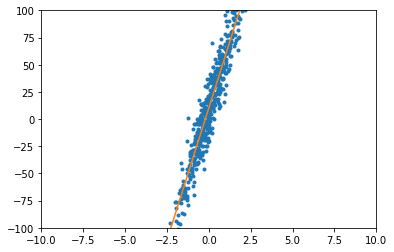

In [71]:
plt.xlim(-10,10)
plt.ylim(-100,100)
plt.plot(X,y,'.')
x1=np.arange(-10,10)
y1=W[0]+ W[1]*x1
plt.plot(x1,y1)
plt.show()

# stochastic gradient descent

In [87]:
def stochastic_gradient_descent(X,W,y_true, learning_rate=0.1):
    
    loss=[]
    m=X.shape[0]
    for i in range(m):
        grad0= (y_true[i]- hypothesis(X[i],W))
        grad1= (y_true[i]- hypothesis(X[i],W))*X[i]
        W[0]+= learning_rate*grad0
        W[1]+= learning_rate*grad1
        error=get_error(X,W,y_true)
        loss.append(error)
    return loss,W

In [90]:
W=np.array([0.1,0.1])
loss,W= stochastic_gradient_descent(X_train, W, y_train)
print(W)

[ 7.80774662 48.64877885]


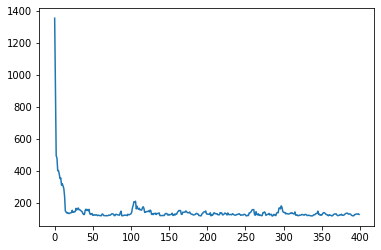

In [91]:
plt.plot(loss)
plt.show()

In [92]:
x11=np.arange(-10,10)
y11=W[0]+W[1]*x11

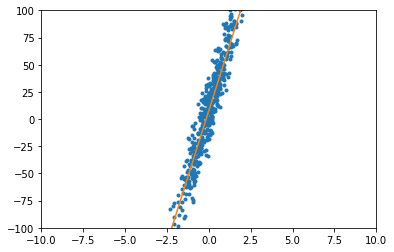

In [95]:
plt.plot(X,y,'.')
plt.plot(x11,y11)
plt.xlim(-10,10)
plt.ylim(-100,100)
plt.show()

In [96]:
#Using sklearn

In [97]:
from sklearn.linear_model import LinearRegression

In [106]:
reg=LinearRegression().fit(X_train,y_train)
reg.score(X_test,y_test)

0.9204917971252593

In [104]:
reg.coef_

array([52.07509604])

In [105]:
reg.intercept_

10.600245174102557

In [ ]:
#score->gives R^2 error see from the page